In [3]:
from itertools import chain

from scipy.stats import norm
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [86]:
def frac(taille_échantillon, nombre_fragments):
	# On prends chaque échantillon et lui associe un nombre de fractures, converti en int à la volée
	if nombre_fragments > taille_échantillon:
		raise ValueError(
			'\n\n\n'
			'ERREUR: Le nombre de fragments demandé est trop grand, il est impossible de continuer\n'
			'Vous pouvez: \n'
			'\t- Réduire le nombre de fragments demandé, en jouant sur N et sigma\n'
			'\t- Augmenter la taille des échantillons à fracturer\n'
		)
	# Il y aura n - 1 fractures pour obtenir n elements
	nombre_fractures = nombre_fragments - 1
	# Une fracture sera placée avant l'index désigné, donc une fracture
	#   localisée à l'index 1 donnera un morceau de 1 et un de taille - 1
	fractures = set()
	while len(fractures) < nombre_fractures:
		fractures.update(np.random.randint(1, taille_échantillon - 1, nombre_fractures))
	print(list(sorted(fractures))[:10])
	if len(fractures) != nombre_fractures:
		if len(fractures) < nombre_fractures:
			raise RuntimeError('ERREUR: Une erreur s\'est produite: pas assez de fragments')
		fractures = set(list(fractures)[:nombre_fractures])
	fractures = [0] + list(sorted(fractures)) + [taille_échantillon]
	print(list(sorted(fractures))[-10:])
	échantillon_fracturé = [
		fractures[i + 1] - fractures[i] for i in range(nombre_fragments)
	]
	if sum(échantillon_fracturé) != taille_échantillon:
		raise RuntimeError(
			"ERREUR: Une erreur s'est produite lors de la fragmentation, \n"
			f"Nous avons {abs(sum(échantillon_fracturé) - taille_échantillon)}"
			f" fragments de différence entre ce qu'on attendais et ce qu'on a"
		)
	print(list(i for i in sorted(échantillon_fracturé))[:10])
	return échantillon_fracturé

In [87]:
def fracture(echantillons, n=65952, sigma=100):
	"""
	Fracture une liste d'échantillons en utilisant un nombre de fractures variables de loi n = Norm(N, sigma)
	:param sigma:
	:param n: Ecart-type
	:param echantillons:
	:return:
	"""
	#
	échantillons_fracturés = []

	# randn nous donne la loi normale centrée, on la convertis donc avec cette ligne
	n = n + np.random.randn(len(echantillons)) * sigma
	#n = np.random.uniform(0, 131206, len(echantillons))#erreur
	#n = np.random.poisson(65603, len(echantillons))
	#n = np.random.geometric(1./65603, len(echantillons))#erreur
	#n = np.random.exponential(1./65603, len(echantillons))
	for i in range(len(echantillons)):
		n[i]=n[i]/len(echantillons)
	
	# On prends chaque échantillon et lui associe un nombre de fractures, converti en int à la volée
	for nombre_fragments, taille_échantillon in zip(map(int, n), echantillons):

		if nombre_fragments > taille_échantillon:
			raise ValueError(
				'\n\n\n'
				'ERREUR: Le nombre de fragments demandé est trop grand, il est impossible de continuer\n'
				'Vous pouvez: \n'
				'\t- Réduire le nombre de fragments demandé, en jouant sur N et sigma\n'
				'\t- Augmenter la taille des échantillons à fracturer\n'
			)
		# Il y aura n - 1 fractures pour obtenir n elements
		nombre_fractures = nombre_fragments - 1

		# Une fracture sera placée avant l'index désigné, donc une fracture
		#   localisée à l'index 1 donnera un morceau de 1 et un de taille - 1
		fractures = set()
		while len(fractures) < nombre_fractures:
			fractures.update(np.random.randint(1, taille_échantillon - 1, nombre_fractures))
		if len(fractures) != nombre_fractures:
			if len(fractures) < nombre_fractures:
				raise RuntimeError('ERREUR: Une erreur s\'est produite: pas assez de fragments')
			fractures = set(list(fractures)[:nombre_fractures])
		fractures = [0] + list(sorted(fractures)) + [taille_échantillon]
		échantillon_fracturé = [
			fractures[i + 1] - fractures[i] for i in range(nombre_fragments)
		]
		if sum(échantillon_fracturé) != taille_échantillon:
			raise RuntimeError(
				"ERREUR: Une erreur s'est produite lors de la fragmentation, \n"
				f"Nous avons {abs(sum(échantillon_fracturé) - taille_échantillon)}"
				f" fragments de différence entre ce qu'on attendais et ce qu'on a"
			)
		échantillon_fracturé = list(i for i in sorted(échantillon_fracturé))
		échantillons_fracturés.append(échantillon_fracturé)

	return échantillons_fracturés

In [88]:
taille_genome = 1000000
nombre_morceaux = 65603
seuil = 80000
fragments = list(chain.from_iterable(fracture([taille_genome] * 1000, nombre_morceaux)))
#fragments = [x for x in fragments if x < seuil]

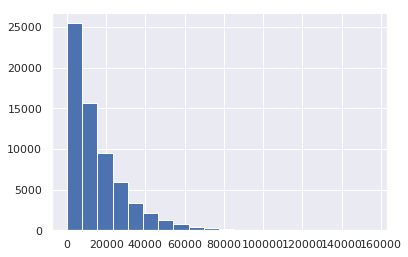

In [89]:
sns.set(color_codes=True)
#sns.distplot(fragments, kde=False, rug=False)
plt.show()
if __name__ == '__main__':
	plt.hist(fragments, bins=20)
	plt.show()


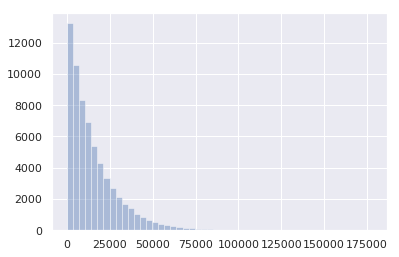

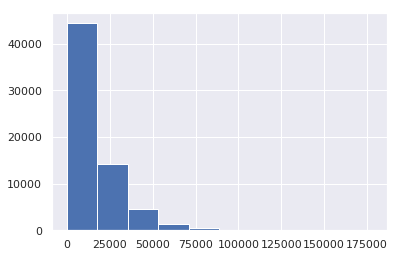

In [90]:
taille_genome = 1000000
nombre_morceaux = 65719

fragments = list(chain.from_iterable(fracture([taille_genome] * 1000, nombre_morceaux)))

norm = []
sns.set(color_codes=True)
sns.distplot(fragments, kde=False, rug=False)
plt.show()
if __name__ == '__main__':
	plt.hist(fragments)
	plt.show()
